## author: 杨航锋
## date: 2018.11.13

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
sns.set_style("darkgrid")

In [3]:
train_data = pd.read_csv("New-6000/Train.csv", header=None)
test_data = pd.read_csv("New-6000/Test.csv", header=None)
train_label = pd.read_csv("New-6000/Label_Train.csv", header=None)
test_label = pd.read_csv("New-6000/Label_Test.csv", header=None)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 22500 entries, 0 to 22499
dtypes: float64(22500)
memory usage: 1.0 GB


In [96]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 22500 entries, 0 to 22499
dtypes: float64(22500)
memory usage: 1.0 GB


In [6]:
train_data.head()

0         1         2        3         4         5         6      \
0 -0.474667  0.612856  1.535963  3.47858 -0.982439 -1.342063  0.926641   
1 -0.474667  0.612856  1.535963  3.47858 -0.982439 -1.342063  0.926641   
2 -0.474667  0.612856  1.535963  3.47858 -0.982439 -1.342063  0.926641   
3 -0.474667  0.612856  1.535963  3.47858 -0.982439 -1.342063  0.926641   
4 -0.474667  0.612856  1.535963  3.47858 -0.982439 -1.342063  0.926641   

      7         8        9      ...    22490  22491  22492  22493  22494  \
0  2.302734 -0.766516 -1.26021  ...      0.0    0.0    0.0    0.0    0.0   
1  2.302734 -0.766516 -1.26021  ...      0.0    0.0    0.0    0.0    0.0   
2  2.302734 -0.766516 -1.26021  ...      0.0    0.0    0.0    0.0    0.0   
3  2.302734 -0.766516 -1.26021  ...      0.0    0.0    0.0    0.0    0.0   
4  2.302734 -0.766516 -1.26021  ...      0.0    0.0    0.0    0.0    0.0   

   22495  22496  22497  22498  22499  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0  

[5 rows x 22500 columns]

In [10]:
import keras 
from keras.models import Sequential 
from keras import layers
from keras import metrics, losses
from keras.optimizers import RMSprop 

In [26]:
train_data_ = np.expand_dims(train_data, axis=2)
test_data_ = np.expand_dims(test_data, axis=2)

In [27]:
model = Sequential()
model.add(layers.Conv1D(64, 9, activation='relu', input_shape=(22500, 1)))
model.add(layers.Conv1D(64, 9, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Dropout(0.5)) 
# model.add(layers.Conv1D(64, 7, activation='relu'))
# model.add(layers.Conv1D(64, 7, activation='relu'))
# model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalAveragePooling1D()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(2, activation='sigmoid'))

In [28]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [89]:
history = model.fit(train_data_,
                    np.array(train_label),
                    epochs=10,
                    batch_size=128,
                    validation_split=0.15
                    )

Train on 5100 samples, validate on 900 samples
Epoch 1/10
5100/5100 [==============================] - 355s 70ms/step - loss: 0.5655 - acc: 0.7907 - val_loss: 0.5478 - val_acc: 0.7844
Epoch 2/10
5100/5100 [==============================] - 335s 66ms/step - loss: 0.5514 - acc: 0.7916 - val_loss: 0.5380 - val_acc: 0.7844
Epoch 3/10
5100/5100 [==============================] - 410s 80ms/step - loss: 0.5389 - acc: 0.7903 - val_loss: 0.5277 - val_acc: 0.7844
Epoch 4/10
5100/5100 [==============================] - 396s 78ms/step - loss: 0.5329 - acc: 0.7912 - val_loss: 0.5181 - val_acc: 0.7850
Epoch 5/10
5100/5100 [==============================] - 360s 71ms/step - loss: 0.5211 - acc: 0.7907 - val_loss: 0.5120 - val_acc: 0.7850
Epoch 6/10
5100/5100 [==============================] - 327s 64ms/step - loss: 0.5213 - acc: 0.7912 - val_loss: 0.5090 - val_acc: 0.7856
Epoch 7/10
5100/5100 [==============================] - 321s 63ms/step - loss: 0.5178 - acc: 0.7898 - val_loss: 0.5064 - val_acc: 0

In [90]:
# save model and load model
# model.save('model_1.h5')
# model = keras.models.load_model('model_1.h5')

model.save('model_2.h5')
# model = keras.models.load_model('model_2.h5')

In [24]:
# model_1 in test_data [loss, accuracy]
model.evaluate(test_data_, test_label)

6000/6000 [==============================] - 127s 21ms/step


[0.5547116565704345, 0.7898333333333334]

In [91]:
# model_2 in test_data [loss, accuracy]
model.evaluate(test_data_, test_label)

6000/6000 [==============================] - 123s 20ms/step


[0.49318422214190166, 0.791]

In [97]:
def draw_accuracy_loss_curve(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    fig, ax = plt.subplots(2, 1, sharex=True)

    ax[0].plot(epochs, acc, 'r*', label='Training acc')
    ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
    ax[0].set_title('Training and Validation accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_ylim(0.5, 1)
    ax[0].set_xlim(1, 10)
    ax[0].legend(loc='best')

    ax[1].set_title('Training and validation loss')
    ax[1].set_ylabel('loss')
    ax[1].set_ylim(0.3, 0.8)
    ax[1].plot(epochs, loss, 'r<', label='Training loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
    ax[1].legend(loc='best')

    plt.xlabel("epochs")
    fig.tight_layout()

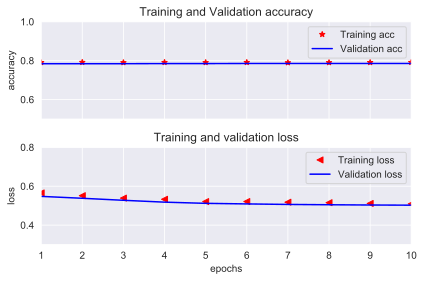

In [98]:
draw_accuracy_loss_curve(history)